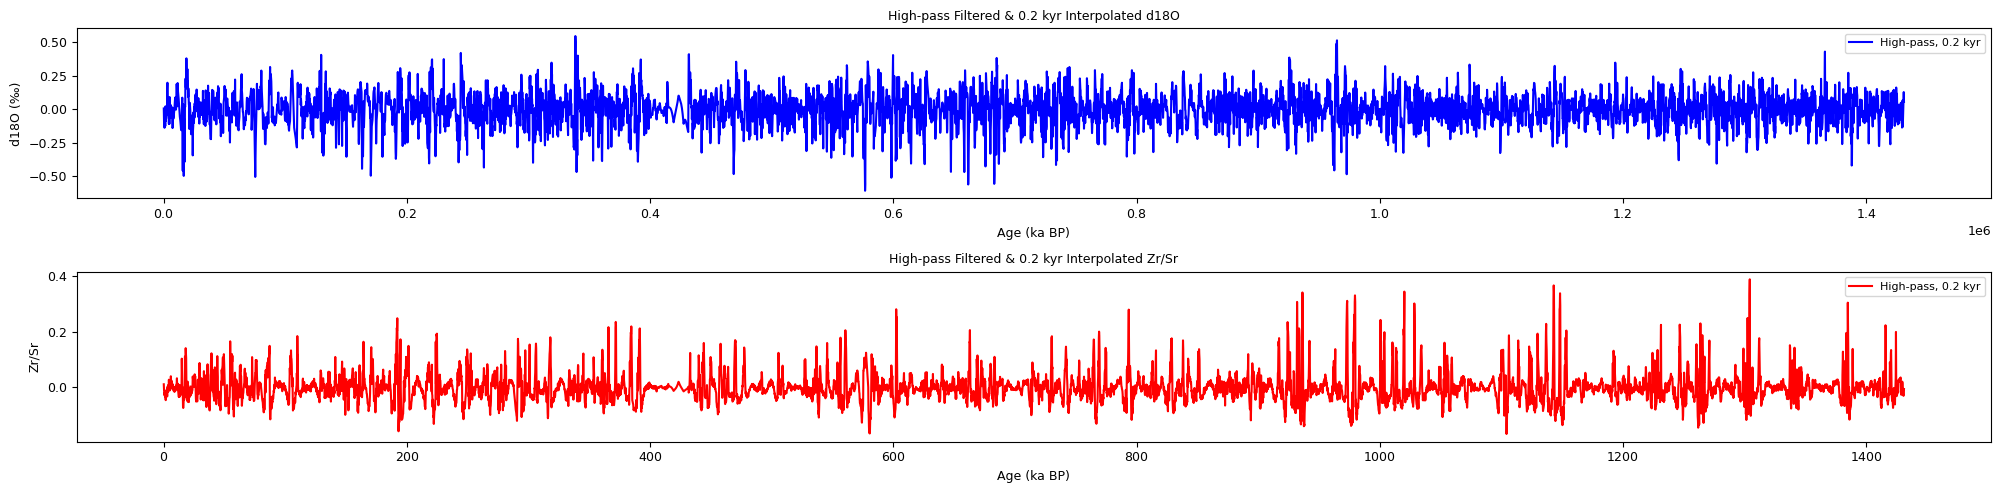

Are there any NaN values in the interpolated d18O data? False
Are there any NaN values in the interpolated ZrSr data? False


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# read the csv data
df_d18O_0_2 = pd.read_csv(r'D:\VScode\bipolar_seesaw_CCM\David_data\MD01-2444_339-U1385_benthic_d18O_hp.csv')
df_ZrSr_0_2 = pd.read_csv(r'D:\VScode\bipolar_seesaw_CCM\David_data\339-U1385_CaTi_ZrSr_hp.csv')

df_d18O_0_2['age']=df_d18O_0_2['age']*1000

# 5) Plot filtered & downsampled series
plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
plt.plot(df_d18O_0_2['age'], df_d18O_0_2['d18O_hp'], color='blue', label='High-pass, 0.2 kyr')
plt.xlabel('Age (ka BP)')
plt.ylabel('d18O (‰)')
plt.title('High-pass Filtered & 0.2 kyr Interpolated d18O')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_ZrSr_0_2['age'], df_ZrSr_0_2['ZrSr_hp'], color='red', label='High-pass, 0.2 kyr')
plt.xlabel('Age (ka BP)')
plt.ylabel('Zr/Sr')
plt.title('High-pass Filtered & 0.2 kyr Interpolated Zr/Sr')
plt.legend()

plt.tight_layout()
plt.show()


df_filt_d18O =df_d18O_0_2.copy()
# rename columns
df_filt_d18O.rename(columns={'d18O_hp': 'filt_d18O'}, inplace=True)

# crop the age<=640,000
df_filt_d18O = df_filt_d18O[df_filt_d18O['age'] <= 640000]


print("Are there any NaN values in the interpolated d18O data?", df_d18O_0_2.isnull().values.any())
print("Are there any NaN values in the interpolated ZrSr data?", df_ZrSr_0_2.isnull().values.any())

In [16]:
df_d18O_0_2

,age,d18O_hp
0,140.0,0.040605
1,340.0,-0.058253
2,540.0,-0.064243
3,740.0,-0.115954
4,940.0,-0.081975
...,...,...
7150,1430140.0,0.116127
7151,1430340.0,0.172513
7152,1430540.0,0.188304
7153,1430740.0,0.169507


In [13]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# fig_pair, fig_bar = sa.age_gap_ana(
#     df_d18O_0_2,
#     age_min=200,
#     age_max=640_000,
#     pre_path=r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt",
#     n_bins=6,
#     tolerance=200
# )



# TE dT plot

     dt     te_xy    p_xy     te_yx    p_yx  sig_uni
0    10  0.000269  0.1195  0.000079  0.9350    False
1    20  0.000582  0.0565  0.000159  0.9105    False
2    30  0.000952  0.0300  0.000240  0.8520     True
3    40  0.001394  0.0095  0.000321  0.8470     True
4    50  0.002177  0.0000  0.000401  0.8605     True
5    60  0.002305  0.0800  0.000452  0.8815    False
6    70  0.002836  0.4725  0.000885  0.5165    False
7    80  0.003315  0.3680  0.001169  0.3955    False
8    90  0.003866  0.3120  0.001303  0.4030    False
9   100  0.004712  0.0640  0.001448  0.3995    False
10  200  0.020319  0.5435  0.006169  0.0090    False


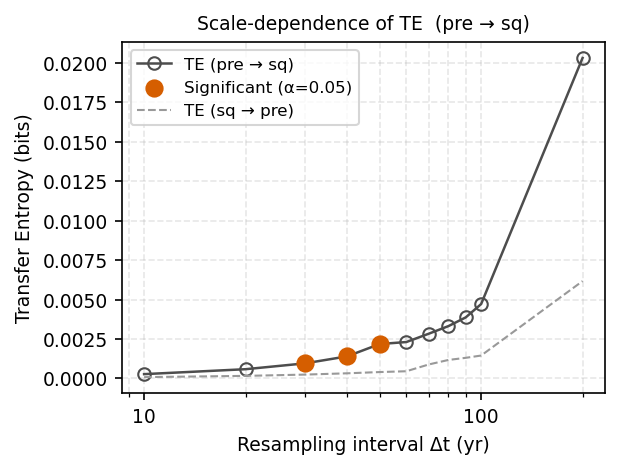

In [34]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_d18O,                 # your raw sq-series
    dt_steps,
    forcing_bins=6, sq_bins=2,
    k=4,
    n_surr=2000, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


     dt     te_xy  p_xy     te_yx  p_yx  sig_uni
0    10  0.000114  1.00  0.000388  0.00    False
1    20  0.000245  0.97  0.000776  0.01    False
2    30  0.000396  0.95  0.001170  0.00    False
3    40  0.000572  0.90  0.001568  0.00    False
4    50  0.000988  0.63  0.001962  0.00    False
5    60  0.001112  0.97  0.002387  0.00    False
6    70  0.002007  0.98  0.002178  0.01    False
7    80  0.005006  0.08  0.002263  0.04    False
8    90  0.003628  0.68  0.002545  0.07    False
9   100  0.003062  0.89  0.002808  0.04    False
10  200  0.024787  0.49  0.003520  0.37    False


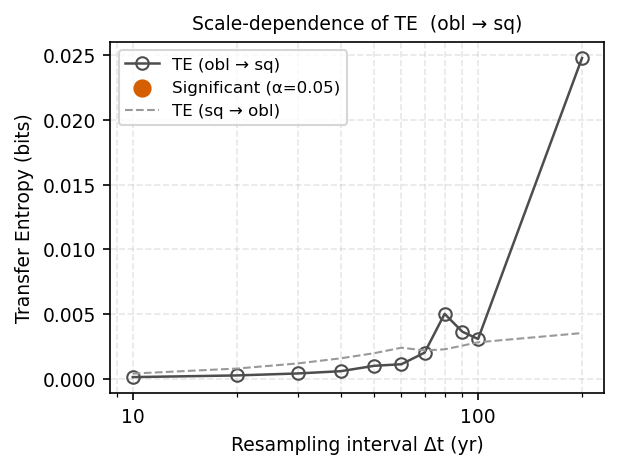

In [35]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_d18O,                 # your raw sq-series
    dt_steps,
    forcing='obl',
    forcing_bins=7, sq_bins=2,
    k=4,
    n_surr=100, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)

# TE from pre and obl to CH4 MCV (dt=10)

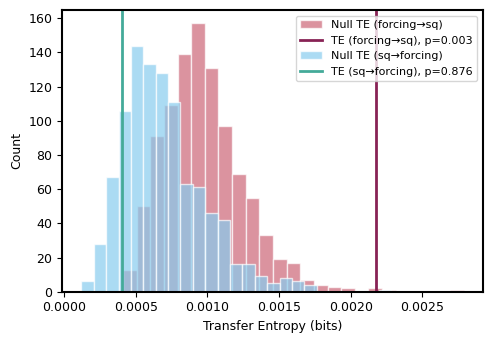

True


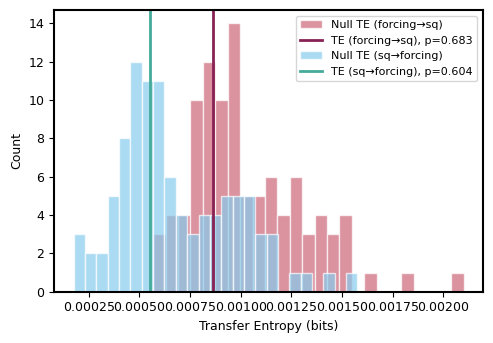

False


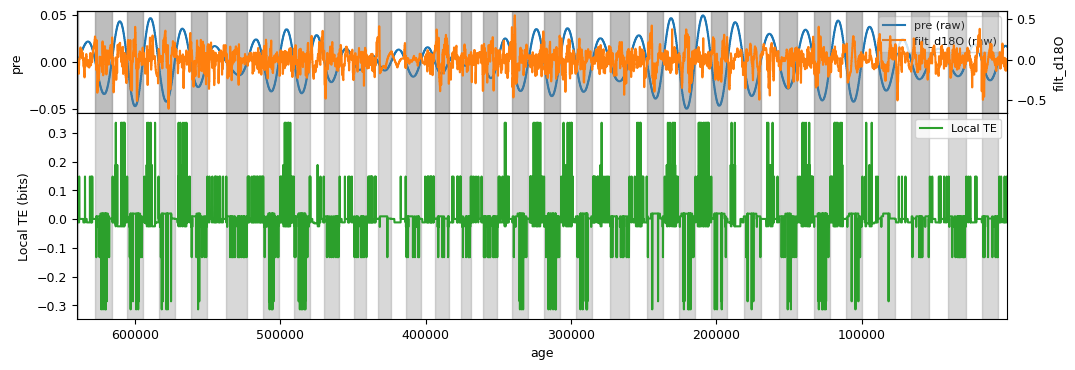

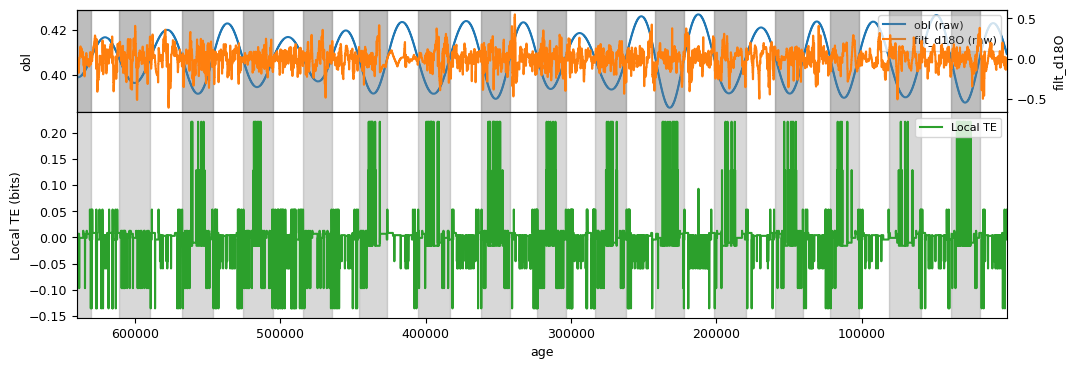

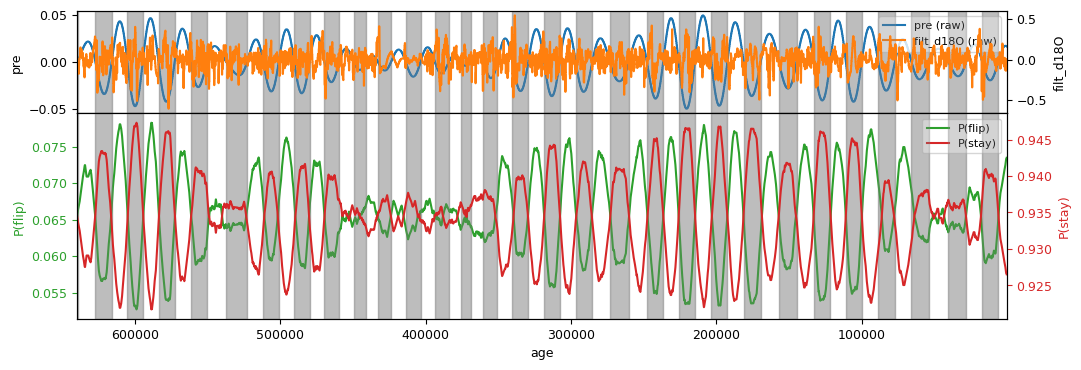

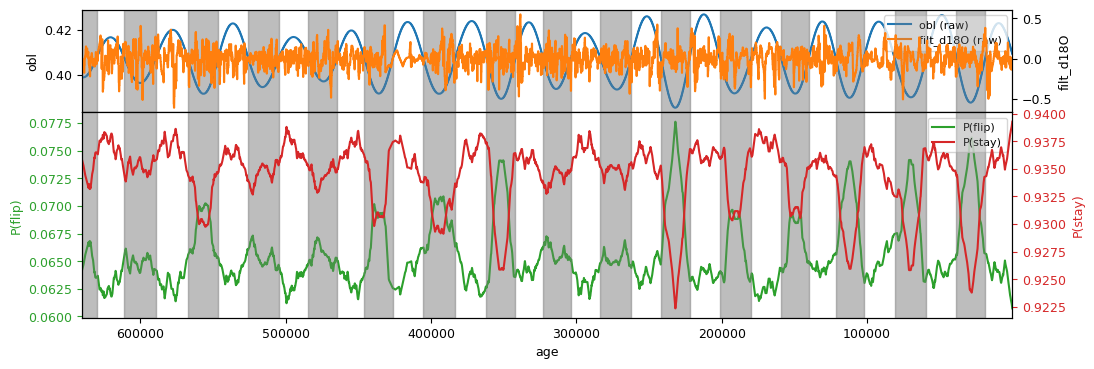

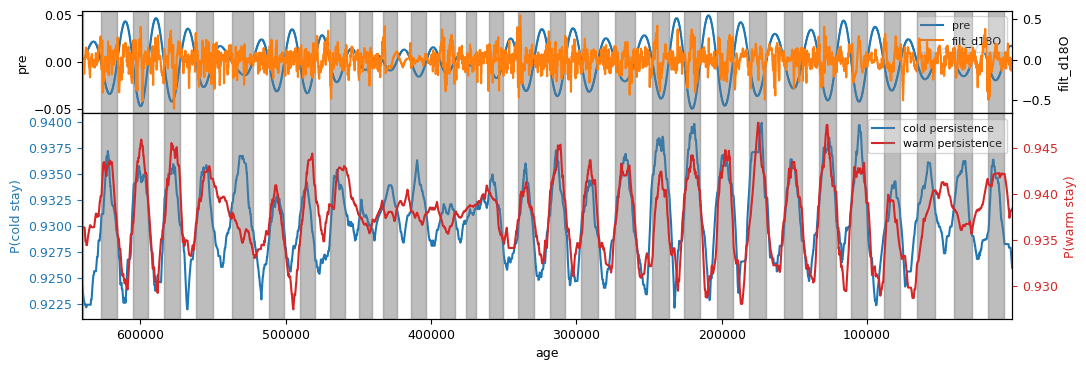

In [36]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 50, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=1000, k=4)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100, k=4)
print(result)


LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)



Lp = sa.local_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)




Lp = sa.local_prob(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)


Lp = sa.local_stay_split(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

# Where the TE comes from

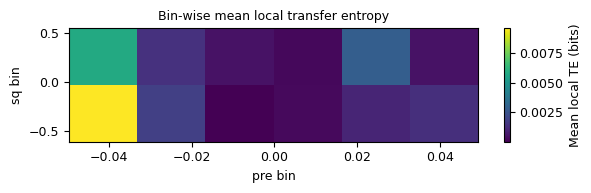

In [37]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


te_grid=sa.heatmap_binwise_local_te(
        pre=pre, sq=sq,
        pre_bins=6, sq_bins=2)

# te_grid=sa.heatmap_binwise_local_te(
#         pre=obl, sq=sq,
#         pre_bins=6, sq_bins=2)

# Frequency domain TE

max-power row = 55   →  period ≈ 23.1 ka


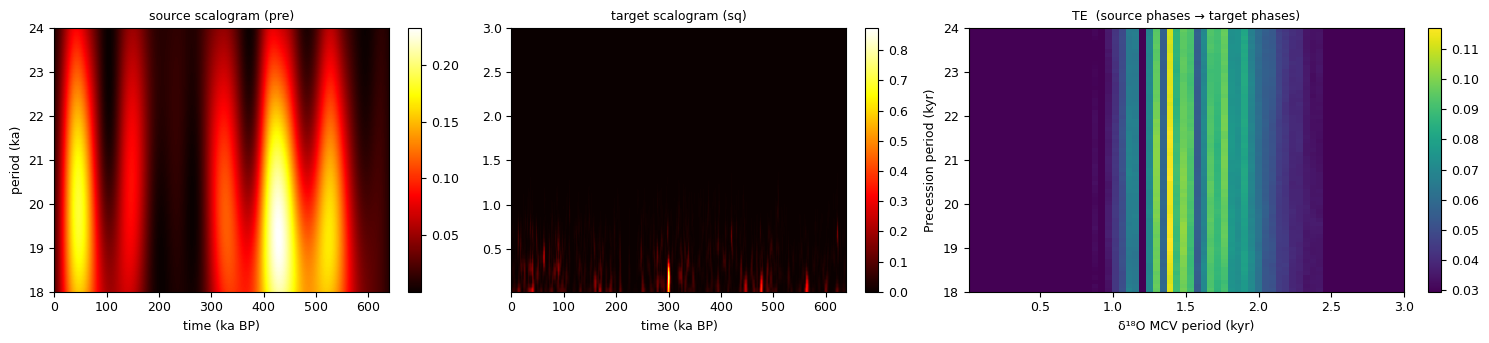

In [38]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_mat, p_src, p_trg = sa.freq_resolved_te(
    x = pre,             # forcing   (chronological order!)
    y = sq,              # response
    sampling_period = 50,     # yr/pt
    # source band: narrow around 20 ka
    src_min_period = 18_000,
    src_max_period = 24_000,
    n_src_scales   = 64,
    # target band: 0.1–3 ka
    trg_min_period = 10,
    trg_max_period = 3_000,
    n_trg_scales   = 64,
    k = 4,
    plot = True,
    source_vname='Precession',       # e.g. 'pre'
    target_vname='δ¹⁸O MCV'        # e.g. 'sq'
)

In [25]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# te_mat, p_src, p_trg = sa.freq_resolved_te(
#     x = obl,             # forcing   (chronological order!)
#     y = sq,              # response
#     sampling_period = 100,     # yr/pt
#     # source band: narrow around 20 ka
#     src_min_period = 35_000,
#     src_max_period = 50_000,
#     n_src_scales   = 64,
#     # target band: 0.1–3 ka
#     trg_min_period = 10,
#     trg_max_period = 3_000,
#     n_trg_scales   = 64,
#     k = 1,
#     plot = True,
#     source_vname='Obliquity',       # e.g. 'pre'
#     target_vname='δ¹⁸O MCV'        # e.g. 'sq'
# )

# P stay P flip analysis

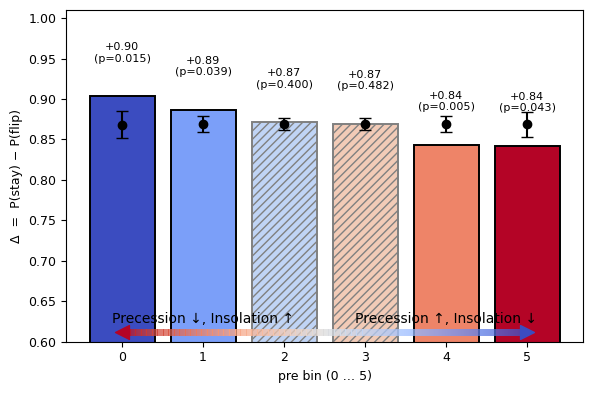

In [39]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
        df_pre_i, df_sq_i,
        forcing_column='pre',
        target_column='filt_d18O',
        nbins_pre=6,
        n_surr=1000,
        alpha=0.05,
        random_state=0   # reproducible
)


# delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
#         df_obl_i, df_sq_i,
#         forcing_column='obl',
#         target_column='filt_d18O',
#         nbins_pre=6,
#         n_surr=1000,
#         alpha=0.05,
#         random_state=0   # reproducible
# )


# P warm stay and P cold stay

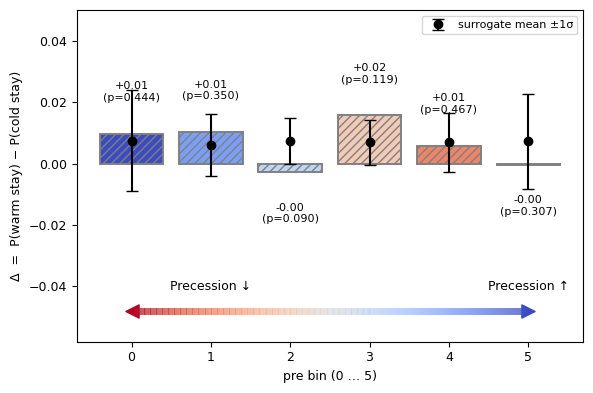

In [40]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_pre_i,
    df_sq       = df_sq_i,
    forcing_column='pre',
    target_column='filt_d18O',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)
# delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
#     df_pre      = df_obl_i,
#     df_sq       = df_sq_i,
#     forcing_column='obl',
#     target_column='filt_d18O',
#     nbins_pre   = 6,
#     n_surr      = 1000,
#     alpha       = 0.05,
#     random_state=0
# )

# The following are sensitivity tests

# Bin count

(12797,) (12797,) (12797,)
      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    434    965   1652   1482   1058    470
sq=1    416   1155   1674   1948   1075    468


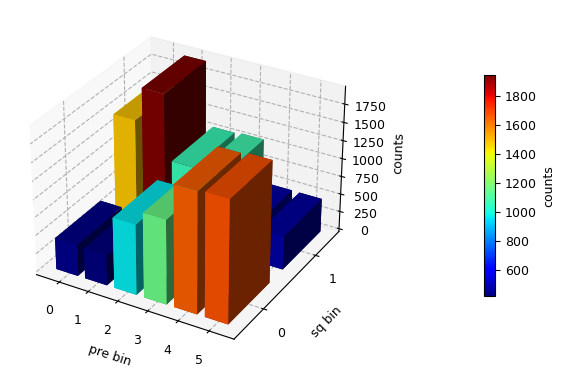

      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    558   1304   1028    934   1254    983
sq=1    602   1402   1060   1093   1540   1039


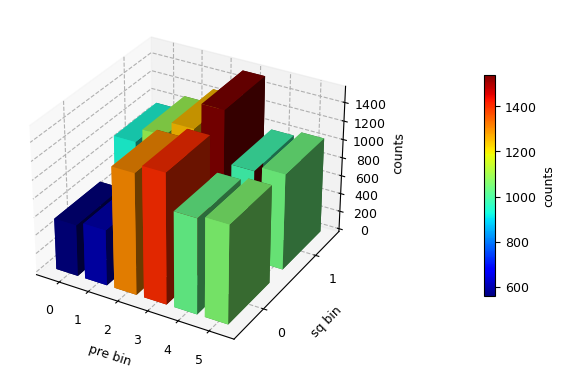

In [41]:
pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

print(sq.shape, pre.shape, obl.shape)

from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

_ = sa.count_sq_pre_contexts_3d(sq, pre, nbins_pre=6)
_ = sa.count_sq_pre_contexts_3d(sq, obl, nbins_pre=6)

# Influence of noise: test on different pre bin numbers, length of history (k)

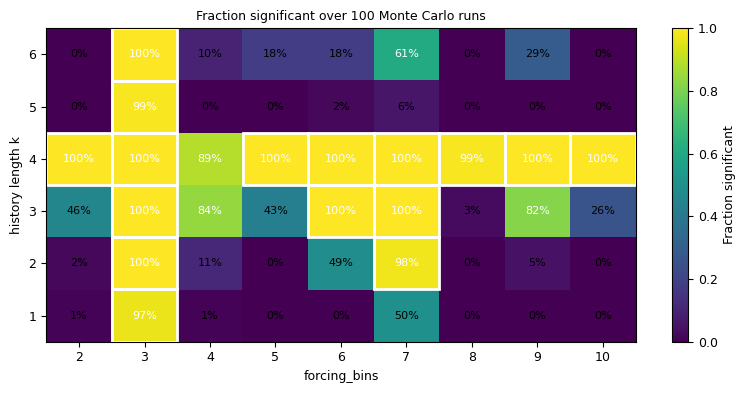

In [32]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 50, if_plot=False)


fractions= sa.mc_TE_heatmap(
    pre =df_pre_i['pre'].values,
    sq =df_sq_i['filt_d18O'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

In [43]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)


# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 100, if_plot=False)

# fractions= sa.mc_TE_heatmap(
#     pre =df_obl_i['obl'].values,
#     sq =df_sq_i['filt_d18O'].values,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     ks=None,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     plot=True)

# Influence of noise, test on different dt

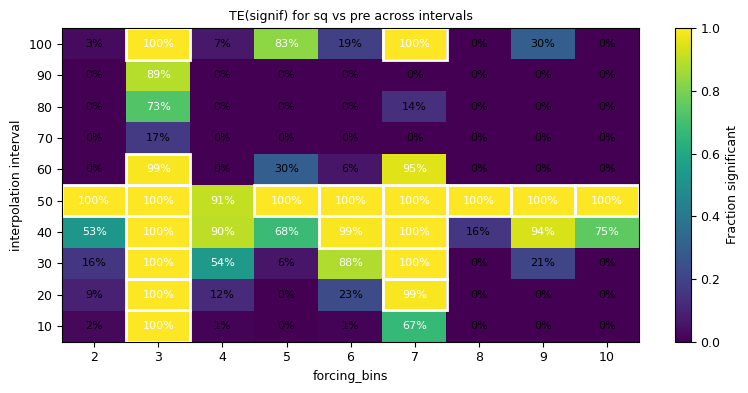

In [44]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

f=sa.mc_TE_heatmap_inter(
    df_filt_d18O.copy(),
    target_column='filt_d18O',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=4,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='pre',
    plot=True
)

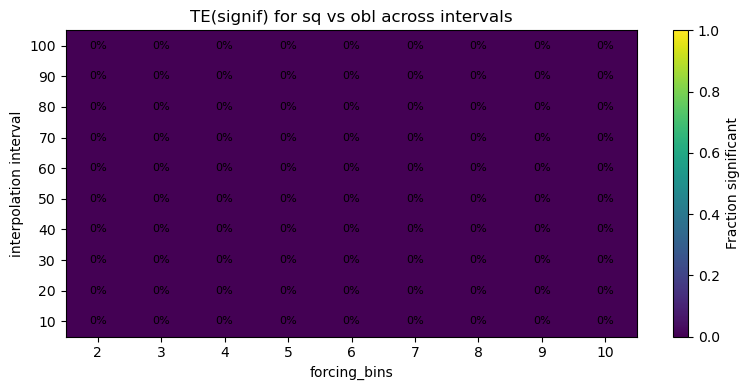

In [ ]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)



# f=sa.mc_TE_heatmap_inter(
#     df_filt_d18O.copy(),
#     target_column='filt_d18O',
#     intervals=None,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     k=1,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     forcing_var='obl',
#     plot=True
# )

# Influence of age scale uncertainty: random scaling experiment

In [17]:
import numpy as np
from toolbox import sq_ana as sa
import importlib
importlib.reload(sa)

# how many random trials?
N = 100

# your maximum age error (as ratio)
max_age_error = 10000
max_age_ratio = max_age_error / np.max(df_filt_d18O['age'].values)

# sigma so that ±2σ = ±max_age_ratio
sigma = max_age_ratio / 2.0

# counters
count_pre_sq = 0
count_obl_sq = 0

for _ in range(N):
    # draw a random ratio, truncated to [-max_age_ratio, +max_age_ratio]
    r = np.random.normal(0, sigma)
    r = np.clip(r, -max_age_ratio, max_age_ratio)
    
    # stretch your age axis
    df_sq_stretch = df_filt_d18O.copy()
    df_sq_stretch['age'] = df_sq_stretch['age'].values * (1.0 + r)
    
    # re-interpolate
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_sq_stretch, 20, if_plot=False
    )
    
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_d18O'].values
    
    # test pre → sq
    result_pre, _ = sa.transfer_entropy_surrogate_test(
        pre, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_pre:
        count_pre_sq += 1
    
    # test obl → sq
    result_obl, _ = sa.transfer_entropy_surrogate_test(
        obl, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_obl:
        count_obl_sq += 1

# report
print(f"Out of {N} random age-errors:")
print(f"  pre → sq was significant in {count_pre_sq} runs")
print(f"  obl → sq was significant in {count_obl_sq} runs")


Out of 100 random age-errors:
  pre → sq was significant in 72 runs
  obl → sq was significant in 100 runs


# Influence of noise: random thining

In [20]:
import numpy as np
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 10, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

def convergence_test(x, y, thinning_fractions, **te_kwargs):
    results = []
    N = len(x)
    for frac in thinning_fractions:
        m = int(N * frac)
        idx = np.sort(np.random.choice(N, m, replace=False))
        sig, te = sa.transfer_entropy_surrogate_test(
            x[idx], y[idx], if_plot=False, **te_kwargs
        )
        results.append((frac, sig))
    return results

fractions = np.linspace(0.2,1.0,5)   # 20%, 40%, …100%
print(convergence_test(pre, sq, fractions,
                       forcing_bins=6, sq_bins=2))

print(convergence_test(obl, sq, fractions,
                       forcing_bins=6, sq_bins=2))



[(0.2, False), (0.4, True), (0.6000000000000001, False), (0.8, True), (1.0, False)]
[(0.2, True), (0.4, True), (0.6000000000000001, True), (0.8, True), (1.0, True)]


# The influence of different bining plan ([max-min]/2; median; k-means)

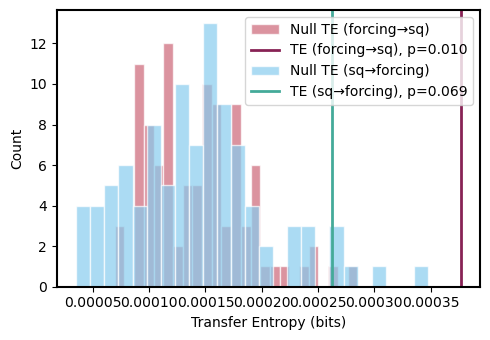

True


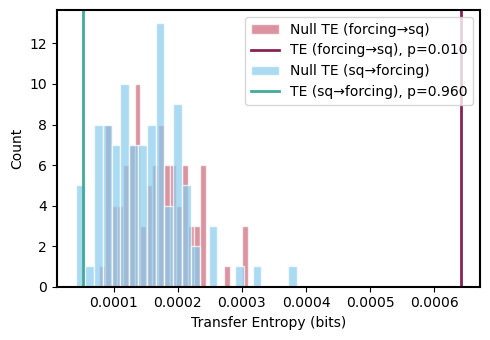

True


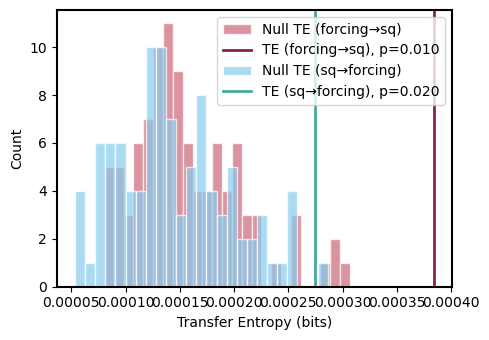

False


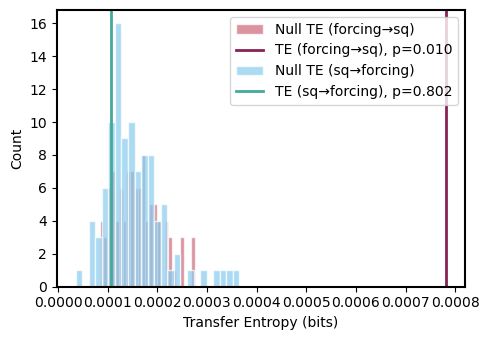

True


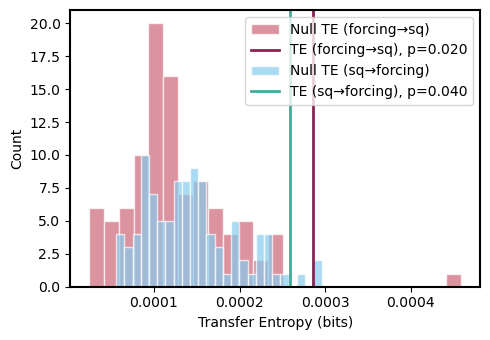

False


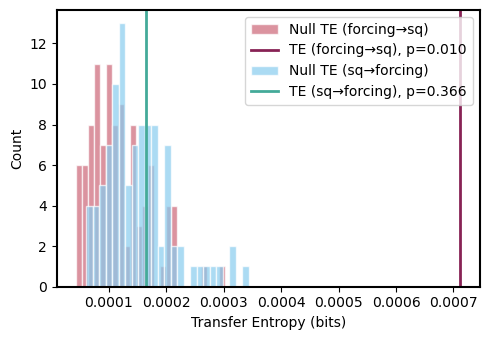

True


In [21]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 10, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


# sq_method='hist',  # options: 'hist', 'quantile', 'kmeans'

result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)



result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)

# Influence of "echo" random shift experiment

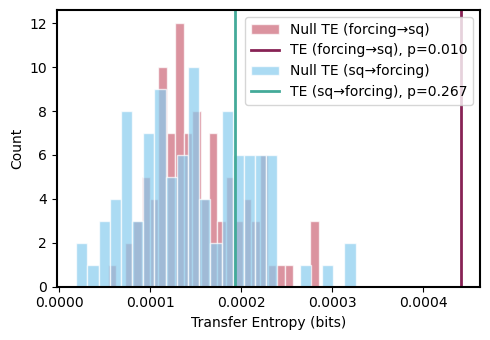

True


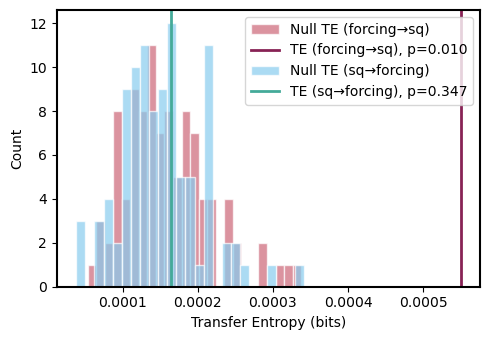

True


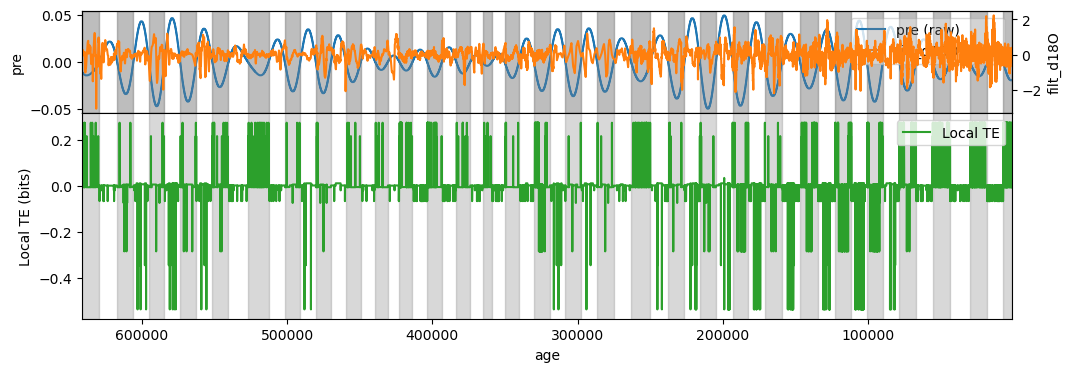

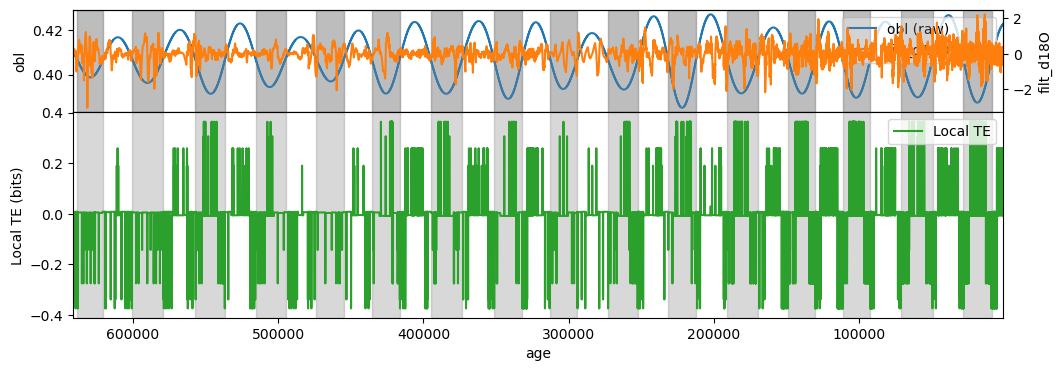

In [22]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.create_shift_forcing(df_filt_d18O.copy(), 10, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)



LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)

# Some other tests

# Check what the null Pre (random swap) looks like

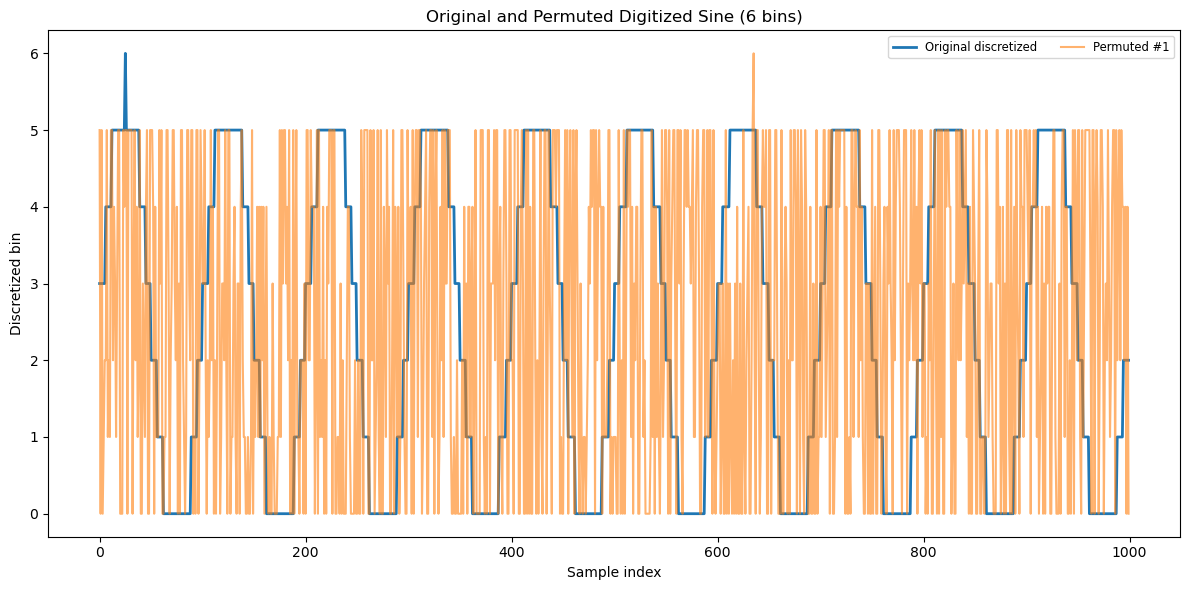

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave with 10 cycles
cycles = 10
N = 1000
t = np.linspace(0, cycles * 2 * np.pi, N)
pre = np.sin(t)

# Discretize into 6 bins
edges = np.histogram_bin_edges(pre, bins=6)
pre_disc = np.digitize(pre, edges) - 1

# Generate 10 permuted surrogates
surrogates = [np.random.permutation(pre_disc) for _ in range(10)]

# Plot original and surrogates
plt.figure(figsize=(12, 6))
plt.plot(pre_disc, label='Original discretized', linewidth=2)
for i, s in enumerate(surrogates, 1):
    plt.plot(s, alpha=0.6, label=f'Permuted #{i}')
    if i == 1:
        break
plt.xlabel('Sample index')
plt.ylabel('Discretized bin')
plt.title('Original and Permuted Digitized Sine (6 bins)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


# The d18O bins

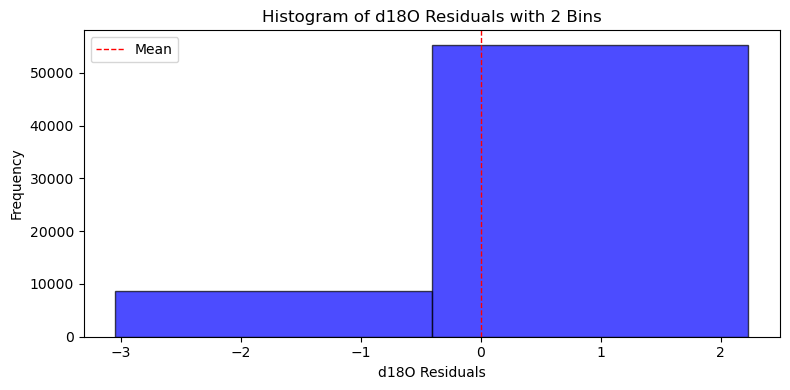

In [23]:
# plot the histogram of sq with bins=2
plt.figure(figsize=(8, 4))
plt.hist(sq, bins=2, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of d18O Residuals with 2 Bins')
plt.xlabel('d18O Residuals')
plt.ylabel('Frequency')
plt.axvline(np.mean(sq), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.tight_layout()